In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

## Reading Data

In [2]:
df = pd.read_csv("../input/netflix-movietv-show/netflix_titles.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


##  Data Exploration

In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Checking for missing values

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Presentation of missing value

In [6]:
#missing_value_sum= df.isnull().sum()
#missing_value_percent=df.isnull().mean()*100
#missing_value_percent
#or
df.isnull().sum()/df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

Text(0.5, 1.0, 'Presentation of Missing values')

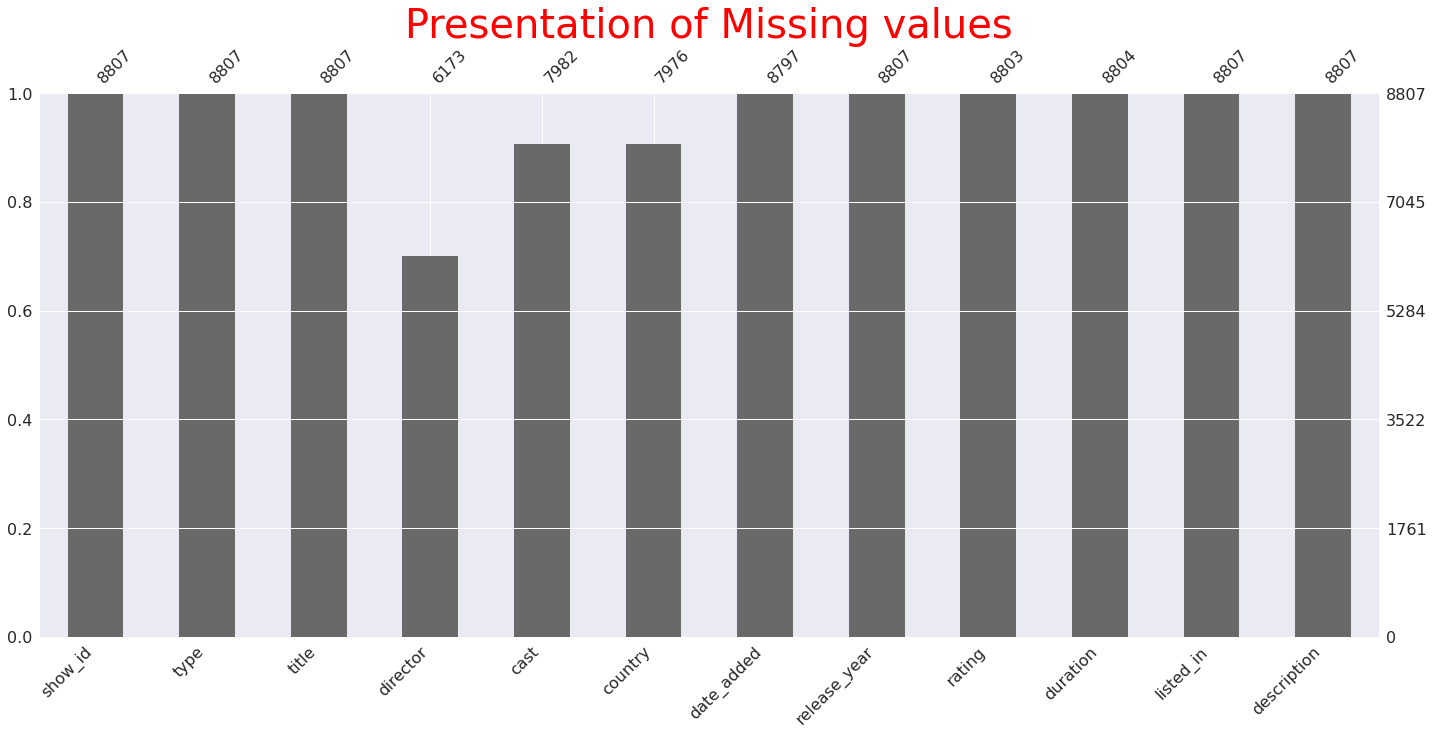

In [7]:
import missingno as msno
msno.bar(df)
plt.title("Presentation of Missing values",fontsize=40, color="red")

We remark that we have missing values in columns direcor and cast but we can't fill this value, so we can drop them

for missing value in columns country,date added,rating we can fill them using most common value and mean 

### Handling missing values

In [8]:
df['country']=df['country'].fillna(df['country'].mode()[0])
df['date_added']=df['date_added'].fillna(df['country'].mode()[0])
df['rating']=df['rating'].fillna(df['rating'].mode()[0])

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

Now we will drop the row missed value of director and cast

In [10]:
df=df.dropna(subset=['director','cast','duration'])

In [11]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

finally we dont have any missing values

In [12]:
df.duplicated().sum()

0

### Cleaning the data

In [13]:
df=df.rename(columns={"listed_in":"Genre"})
df['Genre'] = df['Genre'].apply(lambda x: x.split(",")[0])
df['Genre'].head()

2              Crime TV Shows
5                   TV Dramas
6    Children & Family Movies
7                      Dramas
8            British TV Shows
Name: Genre, dtype: object

In [14]:
df['year_add'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_add'].head()

2    2021
5    2021
6    2021
7    2021
8    2021
Name: year_add, dtype: object

In [15]:
df['month_add'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_add'].head()

2    September
5    September
6    September
7    September
8    September
Name: month_add, dtype: object

In [16]:
df['country_main'] = df['country'].apply(lambda x: x.split(",")[0])
df['country_main'].head()

2     United States
5     United States
6     United States
7     United States
8    United Kingdom
Name: country_main, dtype: object

In [17]:
df.type.value_counts()

Movie      5519
TV Show     178
Name: type, dtype: int64

In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,year_add,month_add,country_main
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,September,United States
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...,2021,September,United States
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September,United States
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...,2021,September,United Kingdom


In [19]:
df['Genre'].value_counts()

Dramas                          1586
Comedies                        1184
Action & Adventure               848
Children & Family Movies         548
Documentaries                    397
Stand-Up Comedy                  309
Horror Movies                    274
International Movies             122
Classic Movies                    73
Thrillers                         65
International TV Shows            59
Crime TV Shows                    37
Movies                            27
British TV Shows                  21
Independent Movies                20
Anime Features                    19
Music & Musicals                  18
Sci-Fi & Fantasy                  13
Cult Movies                       12
Anime Series                      11
Kids' TV                          11
Docuseries                        10
TV Shows                           9
Stand-Up Comedy & Talk Shows       8
Romantic Movies                    3
TV Comedies                        3
Classic & Cult TV                  2
T

we will separate our data to movie and tv show

In [20]:
movie_df=df[df['type']=='Movie']
tv_df=df[df['type']=='TV Show']

### Exploratory Data

#### Movie & TV Show

In [21]:
#movie_df.head()
#tv_df.head()
movie_df.shape


(5519, 15)

In [22]:
tv_df.shape

(178, 15)

we have 5522 Movie and 178 TV Show 

Presentation graphic

<AxesSubplot:xlabel='type', ylabel='count'>

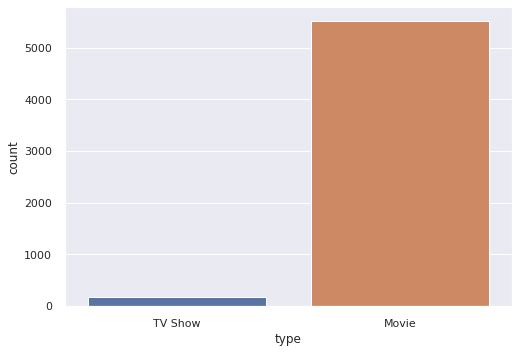

In [23]:
sns.set(style='darkgrid')
sns.countplot(x='type',data=df)


there are more movie than tv show on Netflix

#### Analysis Rating for Movie

Ratings are not designed to indicate that films are appropriate or inappropriate, they are simply a way of saying what kind of content is included in the movie to give parents a chance to make informed decisions on what they are allowing their children to watch.

<AxesSubplot:xlabel='rating', ylabel='count'>

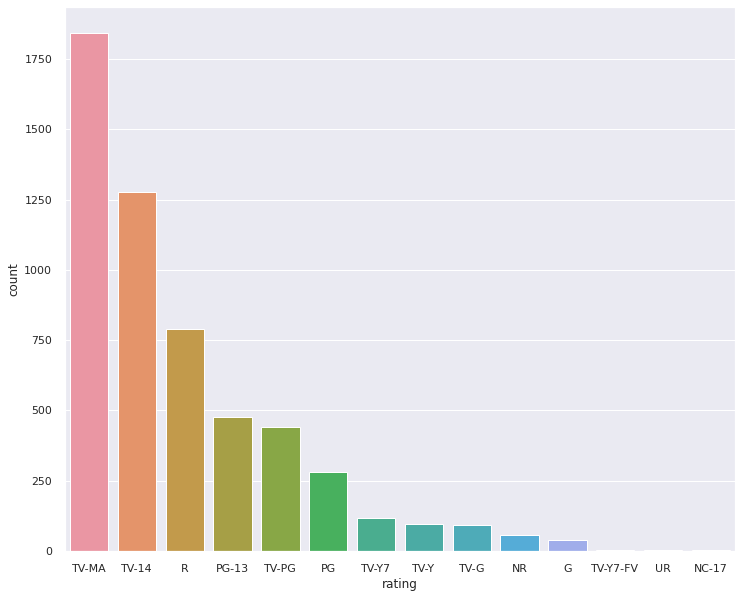

In [24]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
sns.countplot(x='rating',data=movie_df,order= movie_df['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating, "TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.


Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17.

Rating for TV Show

<AxesSubplot:xlabel='rating', ylabel='count'>

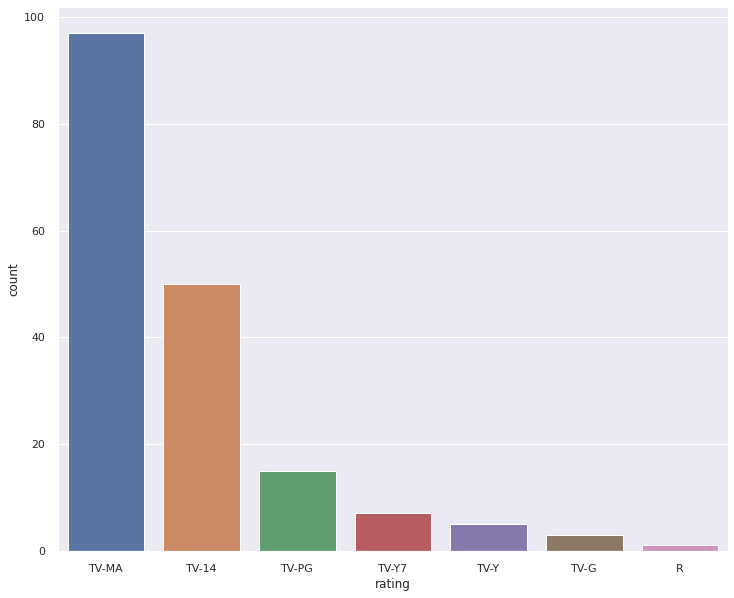

In [25]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
sns.countplot(x='rating',data=tv_df,order= tv_df['rating'].value_counts().index[0:15])

Most of the TV Shows has 'TV-14' ratings which stands for the content can be inappropriate for children under 14 years of age.
atings.

Second highest count of ratings in TV Shows is 'TV-MA', for which the content is for matured audience only.



TV Shows has least amount of counts with 'R' ratings.

#### Analysis released year

<AxesSubplot:xlabel='count', ylabel='release_year'>

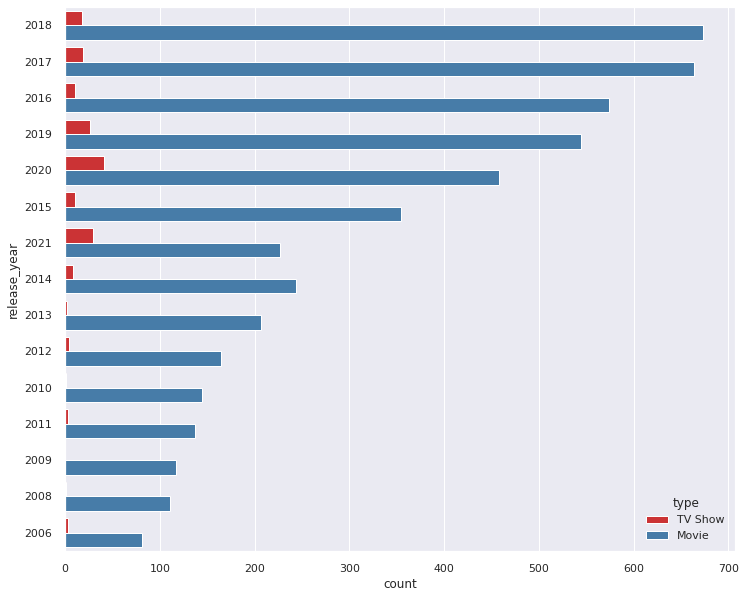

In [26]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
sns.countplot(y='release_year',data=df, order=df['release_year'].value_counts().index[0:15], hue='type',palette='Set1')

we remark that most of content of netflix release in 2018

#### Analysis added year

<AxesSubplot:xlabel='count', ylabel='year_add'>

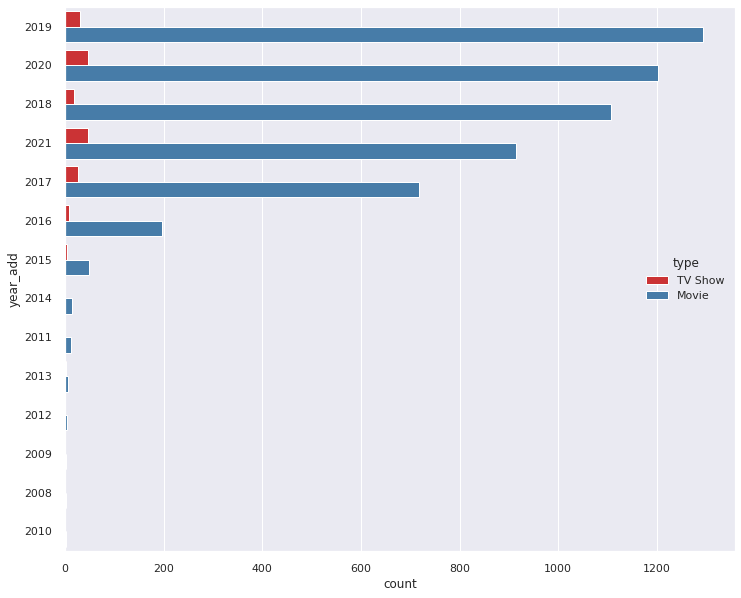

In [27]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
sns.countplot(y='year_add',data=df, order=df['year_add'].value_counts().index[0:15], hue='type',palette='Set1')

 most of contient added to netflix from 2016

####  Analysis of movies duration 

In [28]:
movie_df['duration']=movie_df['duration'].str.replace('min','')
movie_df['duration']=movie_df['duration'].astype(int)
movie_df['duration']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


6        91
7       125
9       104
12      127
13       91
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 5519, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='Density'>

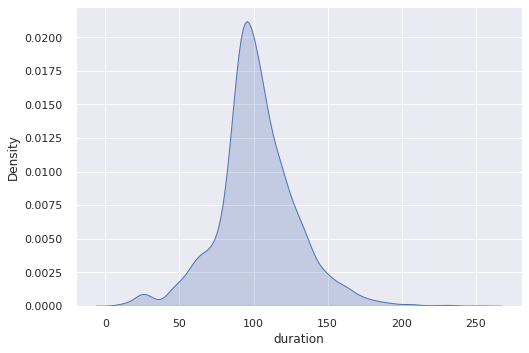

In [29]:
sns.set(style='darkgrid')
sns.kdeplot(data=movie_df['duration'], shade=True)

Most of movie netflix duration between 75-130min

In [30]:
durationbyyear = movie_df.groupby(['release_year']).mean()
durationbyyear = durationbyyear.sort_index()
durationbyyear

,duration
release_year,
1942,18.000000
1944,76.000000
1945,63.000000
1946,58.000000
1947,42.000000
...,...
2017,97.783133
2018,98.237741
2019,97.139706


<function matplotlib.pyplot.show(close=None, block=None)>

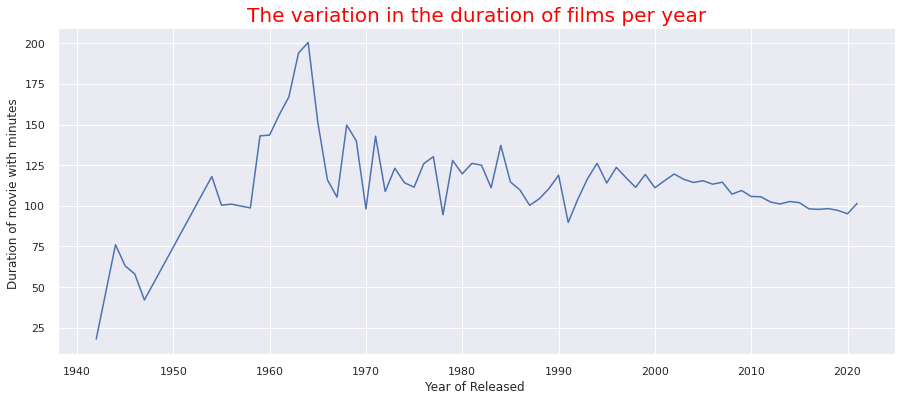

In [31]:
plt.figure(figsize=(15,6))
sns.lineplot(x=durationbyyear.index,y=durationbyyear['duration'],data=durationbyyear )
#plt.box(on=None)
plt.xlabel("Year of Released ")
plt.ylabel("Duration of movie with minutes ")
plt.title("The variation in the duration of films per year", fontsize=20, color='red')
plt.show

We remark that between 1960-1967 the duration was 175-200 min and after 1967 it become less than befor until 2020 the duration was 100min

#### Analysis of TV Shows season

In [32]:
tv_df['duration']=tv_df['duration'].str.replace("Season"," ")
tv_df['duration']=tv_df['duration'].str.replace("s"," ")
tv_df['duration']=tv_df['duration'].astype(int)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [33]:
tv_df['duration']

2       1
5       1
8       9
11      1
47      1
       ..
8172    1
8214    1
8293    1
8302    1
8599    3
Name: duration, Length: 178, dtype: int64

In [34]:
durationtvbyyear=tv_df.groupby(['release_year']).mean()
durationtvbyyear

,duration
release_year,
1990,1.000000
2001,1.000000
2006,3.666667
2008,1.000000
2010,5.000000
2011,1.000000
2012,2.000000
2013,1.000000
2014,1.250000


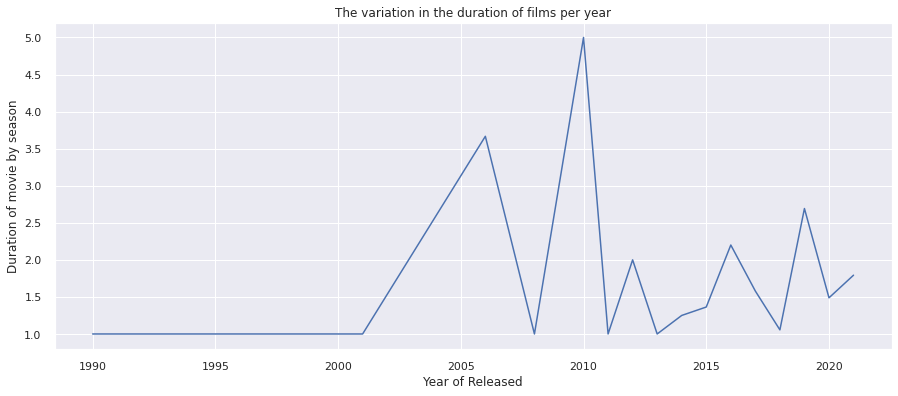

In [35]:
plt.figure(figsize=(15,6))
sns.lineplot(x=durationtvbyyear.index,y=durationtvbyyear['duration'])
plt.xlabel('Year of Released')
plt.ylabel('Duration of movie by season')
plt.title('The variation in the duration of films per year')
plt.show()

We remark that between 2008-2011 the duration was 4-5 season and after 2011 it become less than befor until 2020 the duration was approximatly 2 season